<a href="https://colab.research.google.com/github/dhathrigundum/Group-11-NLP_news-headlines/blob/main/abc_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary libraries
import numpy as np 
import pandas as pd

**Reading data**


In [2]:
data = pd.read_csv('abcnews-date-text.csv')
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


**Data Pre-processing**

In [3]:
data.shape

(1226258, 2)

In [4]:
data.describe()

,publish_date
count,1.226258e+06
mean,2.010875e+07
std,4.720924e+04
min,2.003022e+07
25%,2.007052e+07
50%,2.011051e+07
75%,2.014113e+07
max,2.020123e+07


In [5]:
data.isnull().sum()

publish_date     0
headline_text    0
dtype: int64

In [6]:
data.dtypes

publish_date      int64
headline_text    object
dtype: object

**Feature Engineering**

In [7]:
#creating date, year and month as a seperate columns from publish_date
data["year"] = data["publish_date"].astype(str).str[:4].astype(np.int64)
data["month"] = data["publish_date"].astype(str).str[4:6].astype(np.int64)
data["date"] = data["publish_date"].astype(str).str[6:].astype(np.int64)
data.head()

,publish_date,headline_text,year,month,date
0,20030219,aba decides against community broadcasting lic...,2003,2,19
1,20030219,act fire witnesses must be aware of defamation,2003,2,19
2,20030219,a g calls for infrastructure protection summit,2003,2,19
3,20030219,air nz staff in aust strike for pay rise,2003,2,19
4,20030219,air nz strike to affect australian travellers,2003,2,19


In [8]:
data.year.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [9]:
data.month.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1])

In [10]:
#creating another column word_count to understand how many words in each headline_text
data["word_count"] = data["headline_text"].str.len()
data.head()

,publish_date,headline_text,year,month,date,word_count
0,20030219,aba decides against community broadcasting lic...,2003,2,19,50
1,20030219,act fire witnesses must be aware of defamation,2003,2,19,46
2,20030219,a g calls for infrastructure protection summit,2003,2,19,46
3,20030219,air nz staff in aust strike for pay rise,2003,2,19,40
4,20030219,air nz strike to affect australian travellers,2003,2,19,45


In [11]:
# Creating character count, average word length, punctuations count, stopword count columns for each headline text
data['char_count'] = data['headline_text'].apply(lambda x: len(str(x)))

data['mean_word_length'] = data['headline_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

import string
data['punctuation_count'] = data['headline_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize

import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
english_stops= set(stopwords.words('english'))
data['stop_word_count'] = data['headline_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in english_stops]))
data.head()


,publish_date,headline_text,year,month,date,word_count,char_count,mean_word_length,punctuation_count,stop_word_count
0,20030219,aba decides against community broadcasting lic...,2003,2,19,50,50,7.500000,0,1
1,20030219,act fire witnesses must be aware of defamation,2003,2,19,46,46,4.875000,0,2
2,20030219,a g calls for infrastructure protection summit,2003,2,19,46,46,5.714286,0,2
3,20030219,air nz staff in aust strike for pay rise,2003,2,19,40,40,3.555556,0,2
4,20030219,air nz strike to affect australian travellers,2003,2,19,45,45,5.571429,0,1


**Visualization the features extracted**

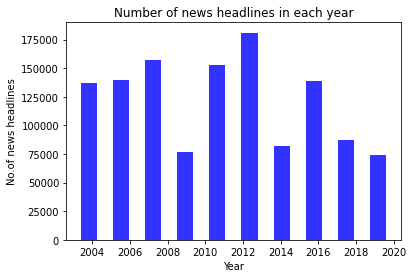

In [14]:
# Visualizing how many articles where published every year, month and each day
import matplotlib.pyplot as plt
plt.hist(data['year'], facecolor='blue', alpha=0.8, rwidth = 0.5)
plt.xlabel('Year')
plt.ylabel('No.of news headlines')
plt.title('Number of news headlines in each year')
plt.show()

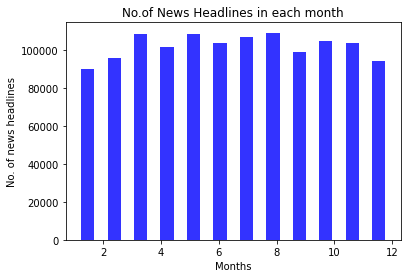

In [15]:
plt.hist(data['month'],12, facecolor='blue', alpha=0.8, rwidth = 0.5)
plt.xlabel('Months')
plt.ylabel('No. of news headlines')
plt.title('No.of News Headlines in each month')
plt.show()

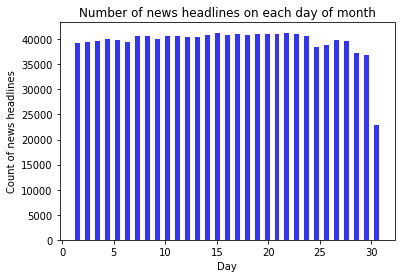

In [16]:
plt.hist(data['date'],31, facecolor='blue', alpha=0.8, rwidth = 0.5)
plt.xlabel('Day')
plt.ylabel('Count of news headlines')
plt.title('Number of news headlines on each day of month')
plt.show()

In [17]:
# defining the new features in a list
 features = ['word_count', 'stop_word_count', 'mean_word_length', 'char_count', 'punctuation_count']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5311f6850>,
      dtype=object)

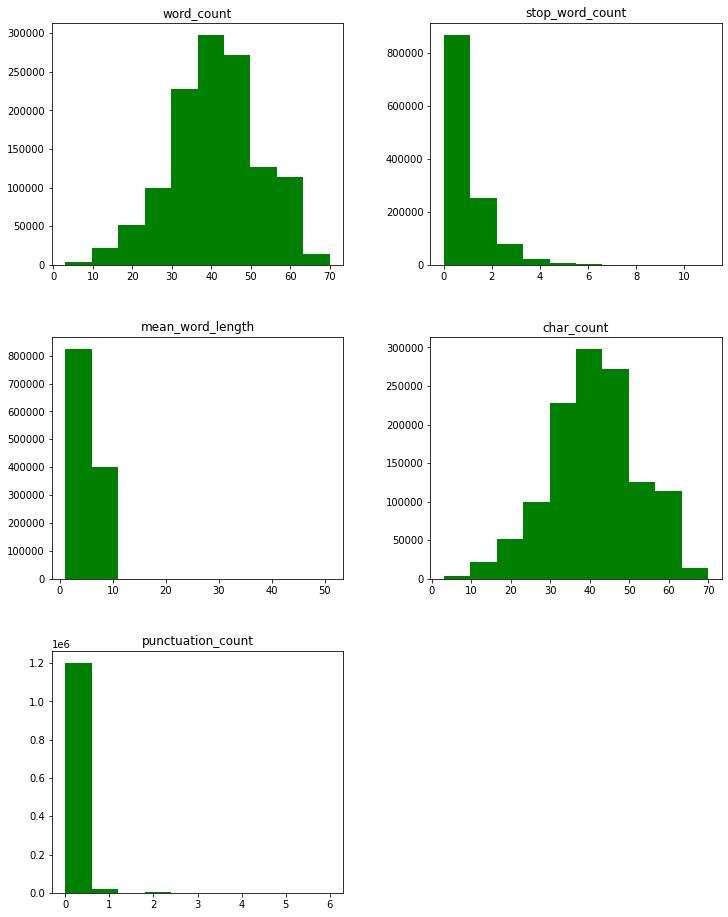

In [19]:
# plotting histograms for the new features
data[features].hist(figsize = (12,16), color='green', grid=False, bins=10)

**Sentiment Analysis**

In [20]:
#Creating a corpus from the headline_text
corpus = str()
for i in range(len(data['headline_text'])):
    corpus += (' ')+data['headline_text'][i]

In [21]:
# Toenization
import nltk
nltk.download('punkt')
words = nltk.word_tokenize(corpus)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
# removing stopwords and punctuations
f_words = [w for w in words if not w in english_stops] 

punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
fp_words = [w for w in f_words if not w in punctuations] 

In [23]:
# To find the frequency of clean words
freq = nltk.FreqDist(fp_words)

for key,val in freq.items():
  str(key) + ':' + str(val)



[('police', 39384), ('new', 32824), ('man', 30512), ('says', 23014), ('us', 20045), ('court', 18014), ('govt', 17057), ('council', 16934), ('australia', 16652), ('nsw', 15749), ('interview', 15545), ('fire', 15350), ('australian', 13186), ('wa', 13079), ('plan', 12922)]


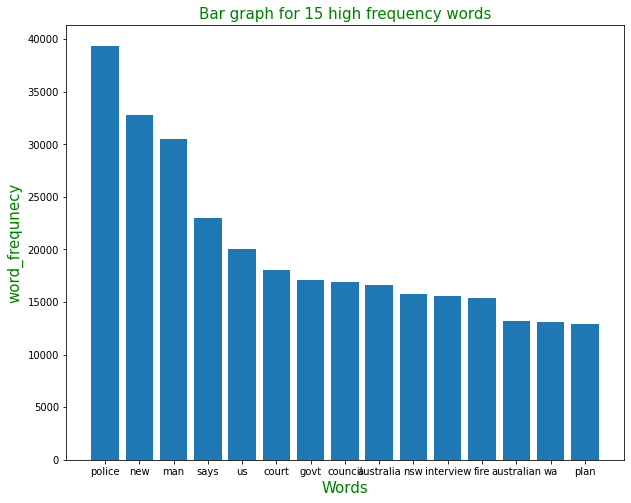

In [24]:
#removing words whose frequency is less than 500 
for x in list(freq.keys()):
  if freq[x]<=500:
    del freq[x]

# finding top 15 commonly used words
freq_2=freq.most_common(15)
print(freq_2)
words=[x[0] for x in freq_2]
word_freq=[x[1] for x in freq_2]

# plotting a graph for top 15 used words.
plt.figure(figsize=(10,8))
plt.bar(words, word_freq)
plt.title('Bar graph for 15 high frequency words', fontsize=15, color='Green')
plt.xlabel('Words', fontsize=15, color='Green')
plt.ylabel('word_frequnecy', fontsize=15, color='Green')
plt.show()